In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

Are we have info about test customers in preiouses data?

In [2]:
import gc
import sys
sys.path.append('../')

from fastai.structured import *
from fastai.column_data import *
np.set_printoptions(threshold=50, edgeitems=20)
from IPython.display import HTML, display
from sklearn import metrics

MERED = "merged"
PATH = "../../../data/home-credit-default-risk/"
#PATH = "../../data/home-credit-default-risk/"

/home/max/anaconda3/envs/fastai-cpu/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/max/anaconda3/envs/fastai-cpu/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [3]:
ls {PATH}

application_test.csv         HomeCredit_columns_description.csv
application_test.csv.zip     installments_payments.csv
application_train.csv        installments_payments.csv.zip
application_train.csv.zip    merged/
bureau_balance.csv           POS_CASH_balance.csv
bureau_balance.csv.zip       POS_CASH_balance.csv.zip
bureau.csv                   previous_application.csv
bureau.csv.zip               previous_application.csv.zip
credit_card_balance.csv      sample_submission.csv.zip
credit_card_balance.csv.zip


In [3]:
file_names = ['application_train', 'application_test']
tables = [pd.read_csv(f'{PATH}{file_name}.csv',low_memory=False) for file_name in file_names]

In [5]:
for t in tables: display(t.head())

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
for t in tables: display(DataFrameSummary(t).summary())

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511,307511,NaN,NaN,NaN,NaN,307511,307511,307511,307499,...,307511,307511,307511,307511,265992,265992,265992,265992,265992,265992
mean,278181,0.0807288,NaN,NaN,NaN,NaN,0.417052,168798,599026,27108.6,...,0.00812979,0.000595101,0.000507299,0.000334947,0.00640245,0.00700021,0.0343619,0.267395,0.265474,1.89997
std,102790,0.272419,NaN,NaN,NaN,NaN,0.722121,237123,402491,14493.7,...,0.0897982,0.0243875,0.0225176,0.0182985,0.0838491,0.110757,0.204685,0.916002,0.794056,1.86929
min,100002,0,NaN,NaN,NaN,NaN,0,25650,45000,1615.5,...,0,0,0,0,0,0,0,0,0,0
25%,189146,0,NaN,NaN,NaN,NaN,0,112500,270000,16524,...,0,0,0,0,0,0,0,0,0,0
50%,278202,0,NaN,NaN,NaN,NaN,0,147150,513531,24903,...,0,0,0,0,0,0,0,0,0,1
75%,367142,0,NaN,NaN,NaN,NaN,1,202500,808650,34596,...,0,0,0,0,0,0,0,0,0,3
max,456255,1,NaN,NaN,NaN,NaN,19,1.17e+08,4.05e+06,258026,...,1,1,1,1,4,9,8,27,261,25
counts,307511,307511,307511,307511,307511,307511,307511,307511,307511,307499,...,307511,307511,307511,307511,265992,265992,265992,265992,265992,265992
uniques,307511,2,2,3,2,2,15,2548,5603,13672,...,2,2,2,2,5,9,9,24,11,25


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,48744,NaN,NaN,NaN,NaN,48744,48744,48744,48720,48744,...,48744,48744,48744,48744,42695,42695,42695,42695,42695,42695
mean,277797,NaN,NaN,NaN,NaN,0.397054,178432,516740,29426.2,462619,...,0.00155917,0,0,0,0.00210798,0.00180349,0.00278721,0.00929851,0.546902,1.98377
std,103170,NaN,NaN,NaN,NaN,0.709047,101523,365397,16016.4,336710,...,0.0394559,0,0,0,0.0463727,0.0461324,0.0540374,0.110924,0.693305,1.83887
min,100001,NaN,NaN,NaN,NaN,0,26941.5,45000,2295,45000,...,0,0,0,0,0,0,0,0,0,0
25%,188558,NaN,NaN,NaN,NaN,0,112500,260640,17973,225000,...,0,0,0,0,0,0,0,0,0,0
50%,277549,NaN,NaN,NaN,NaN,0,157500,450000,26199,396000,...,0,0,0,0,0,0,0,0,0,2
75%,367556,NaN,NaN,NaN,NaN,1,225000,675000,37390.5,630000,...,0,0,0,0,0,0,0,0,1,3
max,456250,NaN,NaN,NaN,NaN,20,4.41e+06,2.2455e+06,180576,2.2455e+06,...,1,0,0,0,2,2,2,6,7,17
counts,48744,48744,48744,48744,48744,48744,48744,48744,48720,48744,...,48744,48744,48744,48744,42695,42695,42695,42695,42695,42695
uniques,48744,2,2,2,2,11,606,2937,7491,677,...,2,1,1,1,3,3,3,7,8,16


In [4]:
train, test = tables

In [5]:
len(train), len(test)

(307511, 48744)

In [6]:
cat_vars = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
           'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
           'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
           'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 
           'OCCUPATION_TYPE','CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
           'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 
           'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
           'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'HOUSETYPE_MODE', 
            'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 
            'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
            'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8',
            'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 
            'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
            'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_YEAR']

contin_vars = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'EXT_SOURCE_1', 'EXT_SOURCE_2',
              'EXT_SOURCE_3', 'YEARS_BEGINEXPLUATATION_AVG', 'APARTMENTS_AVG', 'COMMONAREA_AVG', 'YEARS_BEGINEXPLUATATION_MODE',
               'APARTMENTS_MODE', 'COMMONAREA_MODE', 'YEARS_BEGINEXPLUATATION_MEDI', 'APARTMENTS_MEDI', 'COMMONAREA_MEDI',
               'TOTALAREA_MODE']

index = 'SK_ID_CURR'
dep = 'TARGET'

n = len(train); n

307511

In [7]:
joined = train[cat_vars+contin_vars+[dep, index]].copy()

In [8]:
test[dep] = 0
joined_test = test[cat_vars+contin_vars+[dep, index]].copy()

In [9]:
for v in cat_vars: joined[v] = joined[v].astype('category').cat.as_ordered()

In [10]:
for v in cat_vars: joined_test[v] = joined_test[v].astype('category').cat.as_ordered()

In [11]:
joined['TARGET'] = joined['TARGET'].astype('category')
joined_test['TARGET'] = joined_test['TARGET'].astype('category')

In [12]:
apply_cats(test, joined)

In [13]:
for v in contin_vars:
    joined[v] = joined[v].fillna(0).astype('float32')
    joined_test[v] = joined_test[v].fillna(0).astype('float32')

In [14]:
joined = joined.set_index("SK_ID_CURR")

In [15]:
joined_test = joined_test.set_index("SK_ID_CURR")

In [19]:
#idxs = get_cv_idxs(n, val_pct=150000/n)
#joined_samp = joined.iloc[idxs].set_index("SK_ID_CURR")
#samp_size = len(joined_samp); samp_size

In [16]:
joined.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,APARTMENTS_AVG,COMMONAREA_AVG,YEARS_BEGINEXPLUATATION_MODE,APARTMENTS_MODE,COMMONAREA_MODE,YEARS_BEGINEXPLUATATION_MEDI,APARTMENTS_MEDI,COMMONAREA_MEDI,TOTALAREA_MODE,TARGET
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,Cash loans,M,N,Y,0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,...,0.0247,0.0143,0.9722,0.0252,0.0144,0.9722,0.0250,0.0144,0.0149,1
100003,Cash loans,F,N,N,0,Family,State servant,Higher education,Married,House / apartment,...,0.0959,0.0605,0.9851,0.0924,0.0497,0.9851,0.0968,0.0608,0.0714,0
100004,Revolving loans,M,Y,Y,0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0
100006,Cash loans,F,N,Y,0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0
100007,Cash loans,M,N,Y,0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0


In [17]:
#joined_samp.head()
joined_test.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,APARTMENTS_AVG,COMMONAREA_AVG,YEARS_BEGINEXPLUATATION_MODE,APARTMENTS_MODE,COMMONAREA_MODE,YEARS_BEGINEXPLUATATION_MEDI,APARTMENTS_MEDI,COMMONAREA_MEDI,TOTALAREA_MODE,TARGET
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100001,Cash loans,F,N,Y,0,Unaccompanied,Working,Higher education,Married,House / apartment,...,0.0660,0.0000,0.9732,0.0672,0.0000,0.9732,0.0666,0.0000,0.0392,0
100005,Cash loans,M,N,Y,0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0
100013,Cash loans,M,Y,Y,0,NaN,Working,Higher education,Married,House / apartment,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0
100028,Cash loans,F,N,Y,2,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,...,0.3052,0.1165,0.9970,0.3109,0.1176,0.9970,0.3081,0.1173,0.3700,0
100038,Cash loans,M,Y,N,1,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0


In [18]:
samp_size = n

In [64]:
#joined_samp.head(2)
?proc_df

In [19]:
#df, y, nas, mapper = proc_df(joined_samp, dep, ['SK_ID_CURR'], do_scale=True)
df, y, nas, mapper = proc_df(joined, dep, do_scale=True)
#yl = np.log(y)
yl = y

In [20]:
yl

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..., 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0], dtype=int8)

In [21]:
df_test, _, nas, mapper = proc_df(joined_test, dep, do_scale=True,
                                  mapper=mapper, na_dict=nas)

In [22]:
train_ratio = 0.75
# train_ratio = 0.9
train_size = int(samp_size * train_ratio); train_size
val_idx = list(range(train_size, len(df)))

val_idx

[230633,
 230634,
 230635,
 230636,
 230637,
 230638,
 230639,
 230640,
 230641,
 230642,
 230643,
 230644,
 230645,
 230646,
 230647,
 230648,
 230649,
 230650,
 230651,
 230652,
 230653,
 230654,
 230655,
 230656,
 230657,
 230658,
 230659,
 230660,
 230661,
 230662,
 230663,
 230664,
 230665,
 230666,
 230667,
 230668,
 230669,
 230670,
 230671,
 230672,
 230673,
 230674,
 230675,
 230676,
 230677,
 230678,
 230679,
 230680,
 230681,
 230682,
 230683,
 230684,
 230685,
 230686,
 230687,
 230688,
 230689,
 230690,
 230691,
 230692,
 230693,
 230694,
 230695,
 230696,
 230697,
 230698,
 230699,
 230700,
 230701,
 230702,
 230703,
 230704,
 230705,
 230706,
 230707,
 230708,
 230709,
 230710,
 230711,
 230712,
 230713,
 230714,
 230715,
 230716,
 230717,
 230718,
 230719,
 230720,
 230721,
 230722,
 230723,
 230724,
 230725,
 230726,
 230727,
 230728,
 230729,
 230730,
 230731,
 230732,
 230733,
 230734,
 230735,
 230736,
 230737,
 230738,
 230739,
 230740,
 230741,
 230742,
 230743,
 

In [23]:
#def inv_y(a): return np.exp(a)

def exp_rmspe(y_pred, targ):
    fpr, tpr, thresholds = metrics.roc_curve(targ, y_pred)
    return thresholds

#max_log_y = np.max(yl)
#y_range = (0, max_log_y*1.2)

In [24]:
df.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,YEARS_BEGINEXPLUATATION_AVG,APARTMENTS_AVG,COMMONAREA_AVG,YEARS_BEGINEXPLUATATION_MODE,APARTMENTS_MODE,COMMONAREA_MODE,YEARS_BEGINEXPLUATATION_MEDI,APARTMENTS_MEDI,COMMONAREA_MEDI,TOTALAREA_MODE
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,1,2,1,2,1,7,8,5,4,2,...,0.960978,-0.345180,0.018432,0.961653,-0.327407,0.034883,0.960861,-0.342056,0.020727,-0.411375
100003,1,1,1,1,1,2,5,2,2,2,...,0.987275,0.396431,1.012286,0.987949,0.380977,0.814370,0.987155,0.401242,1.017847,0.197887
100004,2,2,2,2,1,7,8,5,4,2,...,-1.020852,-0.602452,-0.289190,-1.020127,-0.593051,-0.283095,-1.020765,-0.600864,-0.288724,-0.572048
100006,1,1,1,2,1,7,8,5,1,2,...,-1.020852,-0.602452,-0.289190,-1.020127,-0.593051,-0.283095,-1.020765,-0.600864,-0.288724,-0.572048
100007,1,2,1,2,1,7,8,5,4,2,...,-1.020852,-0.602452,-0.289190,-1.020127,-0.593051,-0.283095,-1.020765,-0.600864,-0.288724,-0.572048


In [25]:
df.dtypes
#df.select_dtypes(include=['category'])

NAME_CONTRACT_TYPE                 int8
CODE_GENDER                        int8
FLAG_OWN_CAR                       int8
FLAG_OWN_REALTY                    int8
CNT_CHILDREN                       int8
NAME_TYPE_SUITE                    int8
NAME_INCOME_TYPE                   int8
NAME_EDUCATION_TYPE                int8
NAME_FAMILY_STATUS                 int8
NAME_HOUSING_TYPE                  int8
REGION_POPULATION_RELATIVE         int8
DAYS_BIRTH                        int16
DAYS_EMPLOYED                     int16
DAYS_REGISTRATION                 int16
DAYS_ID_PUBLISH                   int16
OWN_CAR_AGE                        int8
FLAG_MOBIL                         int8
FLAG_EMP_PHONE                     int8
FLAG_CONT_MOBILE                   int8
FLAG_PHONE                         int8
FLAG_EMAIL                         int8
OCCUPATION_TYPE                    int8
CNT_FAM_MEMBERS                    int8
REGION_RATING_CLIENT               int8
REGION_RATING_CLIENT_W_CITY        int8


In [41]:
df_test.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,YEARS_BEGINEXPLUATATION_AVG,APARTMENTS_AVG,COMMONAREA_AVG,YEARS_BEGINEXPLUATATION_MODE,APARTMENTS_MODE,COMMONAREA_MODE,YEARS_BEGINEXPLUATATION_MEDI,APARTMENTS_MEDI,COMMONAREA_MEDI,TOTALAREA_MODE
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100001,1,1,1,2,1,7,7,2,2,2,...,0.963017,0.084996,-0.289190,0.963691,0.115333,-0.283095,0.962899,0.088601,-0.288724,-0.149338
100005,1,2,1,2,1,7,7,5,2,2,...,-1.020852,-0.602452,-0.289190,-1.020127,-0.593051,-0.283095,-1.020765,-0.600864,-0.288724,-0.572048
100013,1,2,2,2,1,0,7,2,2,2,...,-1.020852,-0.602452,-0.289190,-1.020127,-0.593051,-0.283095,-1.020765,-0.600864,-0.288724,-0.572048
100028,1,1,1,2,3,7,7,5,2,2,...,1.011533,2.576474,2.216957,1.012206,2.684276,2.313724,1.011411,2.588688,2.232013,3.417812
100038,1,2,2,1,2,7,7,5,2,2,...,-1.020852,-0.602452,-0.289190,-1.020127,-0.593051,-0.283095,-1.020765,-0.600864,-0.288724,-0.572048


In [26]:
md = ColumnarModelData.from_data_frame(PATH, val_idx, df, yl.astype(int), cat_flds=cat_vars, bs=128,
                                       test_df=df_test, is_reg=False, is_multi=False)

In [27]:
cat_sz = [(c, len(joined[c].cat.categories)+1) for c in cat_vars]
cat_sz

[('NAME_CONTRACT_TYPE', 3),
 ('CODE_GENDER', 4),
 ('FLAG_OWN_CAR', 3),
 ('FLAG_OWN_REALTY', 3),
 ('CNT_CHILDREN', 16),
 ('NAME_TYPE_SUITE', 8),
 ('NAME_INCOME_TYPE', 9),
 ('NAME_EDUCATION_TYPE', 6),
 ('NAME_FAMILY_STATUS', 7),
 ('NAME_HOUSING_TYPE', 7),
 ('REGION_POPULATION_RELATIVE', 82),
 ('DAYS_BIRTH', 17461),
 ('DAYS_EMPLOYED', 12575),
 ('DAYS_REGISTRATION', 15689),
 ('DAYS_ID_PUBLISH', 6169),
 ('OWN_CAR_AGE', 63),
 ('FLAG_MOBIL', 3),
 ('FLAG_EMP_PHONE', 3),
 ('FLAG_CONT_MOBILE', 3),
 ('FLAG_PHONE', 3),
 ('FLAG_EMAIL', 3),
 ('OCCUPATION_TYPE', 19),
 ('CNT_FAM_MEMBERS', 18),
 ('REGION_RATING_CLIENT', 4),
 ('REGION_RATING_CLIENT_W_CITY', 4),
 ('WEEKDAY_APPR_PROCESS_START', 8),
 ('HOUR_APPR_PROCESS_START', 25),
 ('REG_REGION_NOT_LIVE_REGION', 3),
 ('REG_REGION_NOT_WORK_REGION', 3),
 ('LIVE_REGION_NOT_WORK_REGION', 3),
 ('REG_CITY_NOT_LIVE_CITY', 3),
 ('REG_CITY_NOT_WORK_CITY', 3),
 ('LIVE_CITY_NOT_WORK_CITY', 3),
 ('ORGANIZATION_TYPE', 59),
 ('HOUSETYPE_MODE', 4),
 ('OBS_30_CNT_SOCIAL

In [28]:
emb_szs = [(c, min(50, (c+1)//2)) for _,c in cat_sz]
emb_szs

[(3, 2),
 (4, 2),
 (3, 2),
 (3, 2),
 (16, 8),
 (8, 4),
 (9, 5),
 (6, 3),
 (7, 4),
 (7, 4),
 (82, 41),
 (17461, 50),
 (12575, 50),
 (15689, 50),
 (6169, 50),
 (63, 32),
 (3, 2),
 (3, 2),
 (3, 2),
 (3, 2),
 (3, 2),
 (19, 10),
 (18, 9),
 (4, 2),
 (4, 2),
 (8, 4),
 (25, 13),
 (3, 2),
 (3, 2),
 (3, 2),
 (3, 2),
 (3, 2),
 (3, 2),
 (59, 30),
 (4, 2),
 (34, 17),
 (11, 6),
 (34, 17),
 (10, 5),
 (3774, 50),
 (3, 2),
 (3, 2),
 (3, 2),
 (3, 2),
 (3, 2),
 (3, 2),
 (3, 2),
 (3, 2),
 (3, 2),
 (3, 2),
 (3, 2),
 (3, 2),
 (3, 2),
 (3, 2),
 (3, 2),
 (3, 2),
 (3, 2),
 (3, 2),
 (3, 2),
 (3, 2),
 (26, 13)]

In [133]:
?md.get_learner

In [29]:
len(df.columns)-len(cat_vars)

17

In [30]:
m = md.get_learner(emb_szs=emb_szs, n_cont=len(df.columns)-len(cat_vars),
                   emb_drop=0.04, out_sz=2, szs=[1000,500], drops=[0.001,0.01], y_range=None, use_bn=True)
#m.summary()

/home/max/anaconda3/envs/fastai-cpu/lib/python3.6/site-packages/torch/cuda/__init__.py:97: UserWarning: 
    Found GPU0 GeForce GT 755M which is of cuda capability 3.0.
    PyTorch no longer supports this GPU because it is too old.
    
  warnings.warn(old_gpu_warn % (d, name, major, capability[1]))
/home/max/anaconda3/envs/fastai-cpu/lib/python3.6/site-packages/torch/cuda/__init__.py:97: UserWarning: 
    Found GPU1 GeForce GT 755M which is of cuda capability 3.0.
    PyTorch no longer supports this GPU because it is too old.
    
  warnings.warn(old_gpu_warn % (d, name, major, capability[1]))


In [31]:
m

MixedInputModel(
  (embs): ModuleList(
    (0): Embedding(3, 2)
    (1): Embedding(4, 2)
    (2): Embedding(3, 2)
    (3): Embedding(3, 2)
    (4): Embedding(16, 8)
    (5): Embedding(8, 4)
    (6): Embedding(9, 5)
    (7): Embedding(6, 3)
    (8): Embedding(7, 4)
    (9): Embedding(7, 4)
    (10): Embedding(82, 41)
    (11): Embedding(17461, 50)
    (12): Embedding(12575, 50)
    (13): Embedding(15689, 50)
    (14): Embedding(6169, 50)
    (15): Embedding(63, 32)
    (16): Embedding(3, 2)
    (17): Embedding(3, 2)
    (18): Embedding(3, 2)
    (19): Embedding(3, 2)
    (20): Embedding(3, 2)
    (21): Embedding(19, 10)
    (22): Embedding(18, 9)
    (23): Embedding(4, 2)
    (24): Embedding(4, 2)
    (25): Embedding(8, 4)
    (26): Embedding(25, 13)
    (27): Embedding(3, 2)
    (28): Embedding(3, 2)
    (29): Embedding(3, 2)
    (30): Embedding(3, 2)
    (31): Embedding(3, 2)
    (32): Embedding(3, 2)
    (33): Embedding(59, 30)
    (34): Embedding(4, 2)
    (35): Embedding(34, 17)
  

In [124]:
?m.lr_find

In [32]:
lr = 1e-4
m.lr_find()

 57%|█████▋    | 1030/1802 [00:34<00:25, 30.27it/s, loss=0.425]

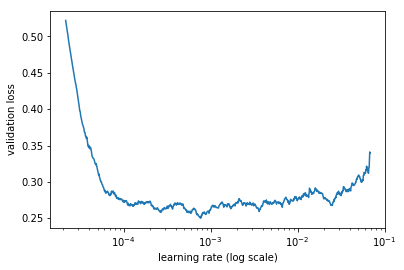

In [138]:
m.sched.plot(100)

In [148]:
lr=1e-4

In [33]:
#m.fit(lr, 3, metrics=[exp_rmspe])
m.fit(lr, 3)

epoch      trn_loss   val_loss                                 
    0      0.254315   0.25197   
    1      0.240775   0.268051                                 
    2      0.211005   0.302756                                 


[array([0.30276])]

In [67]:
m.fit(lr, 5, cycle_len=1)

epoch      trn_loss   val_loss                                 
    0      0.177568   0.349719  
    1      0.180932   0.364477                                 
    2      0.164544   0.386805                                 
    3      0.14899    0.413793                                 
    4      0.12769    0.449823                                 


[array([0.44982])]

In [68]:
m.fit(lr, 3, cycle_len=4, cycle_mult=2 )

epoch      trn_loss   val_loss                                 
    0      0.130215   0.460776  
    1      0.092622   0.562232                                  
    2      0.05956    0.677977                                  
    3      0.045176   0.706303                                  
    4      0.067456   0.761253                                  
    5      0.027373   1.024309                                  
    6      0.014681   1.272002                                  
    7      0.006606   1.486659                                   
    8      0.002776   1.613074                                   
    9      0.001229   1.706542                                    
    10     0.000887   1.742245                                    
    11     0.000621   1.754234                                    
    12     0.009964   1.896049                                   
    13     0.004969   1.968868                                   
    14     0.00294    2.145739                  

[array([2.75036])]

In [34]:
m.save('home_credit')

In [35]:
m.load('home_credit')

In [40]:
#x,y=m.predict_with_targs()
y = m.predict(True)

RuntimeError: cuda runtime error (59) : device-side assert triggered at /opt/conda/conda-bld/pytorch_1525796793591/work/torch/lib/THC/generic/THCTensorCopy.c:20

In [38]:
y

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..., 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0])

In [39]:
val = train.iloc[val_idx]
val[['SK_ID_CURR','TARGET']]
valpred = pd.DataFrame({'SK_ID_CURR':val.SK_ID_CURR, 'TARGET':val.TARGET, 'TARGET_pred':x})[['SK_ID_CURR', 'TARGET','TARGET_pred']]
valpred.head(10)

Exception: Data must be 1-dimensional

In [160]:
valpred.loc[valpred.TARGET == valpred.TARGET_pred].shape

(62986, 3)

- TODO: Prediction must be in prob
- TODO: Need use COR as metrix

In [40]:
m.predict(True)

RuntimeError: cuda runtime error (59) : device-side assert triggered at /opt/conda/conda-bld/pytorch_1518244421288/work/torch/lib/THC/THCTensorCopy.cu:204